# How to Make a Hit

In [158]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ast
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [38]:
rank = pd.read_csv('song_ranks_more.csv', parse_dates=['Date'])[['Position', 'Track Name', 'Artist', 'Streams', 'URL',
       'Region', 'Lyrics', 'Featured', 'Sentiment', 'Words', 'Duration',
       'NumberFeatured', 'Seconds', 'Clean_Lyrics', 'WordsPerLine', 'Date',
       'PopularWords', 'WeightedWords']]
rank.head()

,Position,Track Name,Artist,Streams,URL,Region,Lyrics,Featured,Sentiment,Words,Duration,NumberFeatured,Seconds,Clean_Lyrics,WordsPerLine,Date,PopularWords,WeightedWords
0,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,global,\n\n[Verse 1]\nI'm tryna put you in the worst ...,[],0.131546,385,3:50,0,230,"\nI'm tryna put you in the worst mood, ah\nP1 ...",6.02,2017-01-01,"{'pitt': 1, 'youve': 8, 'tryna': 1, 'main': 1,...","{'listen': 7.5, 'no': 7.5, 'that': 10.7, 'the'..."
1,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,global,"\n\n[Verse 1: Andrew Taggart]\nHey, I was doin...","['Andrew Taggart', 'Halsey']",0.185065,300,4:04,2,244,"\nHey, I was doing just fine before I met you\...",5.00,2017-01-01,"{'corner': 3, 'again': 1, 'no': 8, 'that': 11,...","{'corner': 9.7, 'again': 7.5, 'no': 11.6, 'tha..."
2,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,global,\n\n[Verse 1: Justin Bieber]\nI used to believ...,['Justin Bieber'],0.355556,239,3:25,1,205,\nI used to believe\nWe were burnin' on the ed...,4.69,2017-01-01,"{'somethin': 2, 'oh': 5, 'been': 2, 'to': 2, '...","{'somethin': 8.8, 'awakening': 7.4, 'give': 12..."
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,global,\n\n[Intro: Sean Paul]\nCall it love and devot...,"['Sean Paul', 'Anne-Marie']",0.269615,483,4:11,2,251,\nCall it love and devotion\nCall it a mom's a...,4.83,2017-01-01,"{'ive': 1, 'eyes': 2, 'says': 2, 'looks': 2, '...","{'ive': 7.3, 'eyes': 8.7, 'says': 8.7, 'looks'..."
4,5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,global,"\n\n[Intro: Kyla]\nBaby, I like your style\n\n...","['Kyla', 'Wizkid']",0.076473,329,2:53,2,173,"\nBaby, I like your style\nGrips on your waist...",4.98,2017-01-01,"{'hold': 6, 'wishing': 1, 'no': 1, 'that': 2, ...","{'hold': 10.9, 'wishing': 7.3, 'no': 7.3, 'tha..."


Through multiple methods (csv reading, screen scraping, row algorithms, etc...) the above data frame was created. This data frame displays the top one hundred songs in the world each week from the beginning of 2017. Any songs where lyrics were not found were discluded from the data frame. With this data, we will initially perform simple querying to find which artists (featured and main producer) and songs are the most popular. We can measure this popularity in terms of the number of streams on spotify. Then, we will find what song characteristics seem to be more successful and be able to make predictions about the performance of a song in rankings simply by using song characteristics as predictors. We will also perform time-series analysis on song performance to observe any patterns in popularity as time progresses. Finally, we will generate sample lyrics that have the characteristics of the most popular songs. Unfortunately, data of this sort cannot measure the harmonic sequences of the music, which is often a large part of its popularity. 

## Song Analysis

In [121]:
pd.DataFrame(rank.groupby(rank['Track Name'])['Streams'].sum().sort_values(ascending=False)).head()

,Streams
Track Name,
Shape of You,159616576
Despacito - Remix,87825942
Despacito (Featuring Daddy Yankee),87730620
Something Just Like This,68844395
It Ain't Me (with Selena Gomez),66331966


In [122]:
pd.DataFrame(rank.groupby(rank['Track Name'])['Streams'].mean().sort_values(ascending=False)).head()

,Streams
Track Name,
Despacito - Remix,5.489121e+06
Shape of You,4.988018e+06
I'm the One,3.929992e+06
Wild Thoughts,3.553707e+06
Mi Gente,3.237353e+06


The top data frame displays the songs with the most streams over the course of the year. If we were to add together the two versions of "Despacito", it would become the most played song above "Shape of You". After these two songs, however, there is quite a drop off as the next most-played song has less than half as much. In the second data frame, we see the songs with the highest mean number of streams. This would increase the stock of songs that peak very quickly and then drop back out of the top 100. Songs that are consistently in the top 100 and do not exhibit a high peak are hurt in this category because they are counted so many times. Thus, we can expect "Something Just Like This" and "It Ain't Me" to have a longer duration in the top 100 but "I'm the One", "Wild Thoughts", and "Mi Gente" to have higher peaks. This is exactly what is displayed in the plot below.

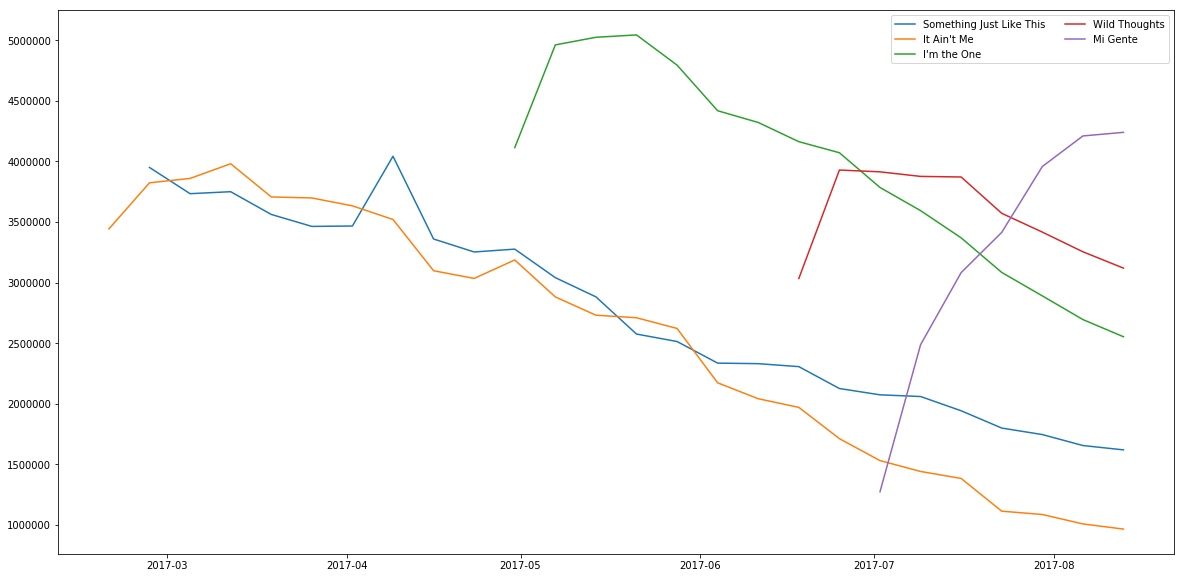

## Artist Analysis

In [39]:
pd.DataFrame(rank.groupby(rank.Artist)['Streams'].count().sort_values(ascending=False)).head()

,Streams
Artist,
Ed Sheeran,180
Drake,166
The Chainsmokers,127
The Weeknd,76
Calvin Harris,66


In [40]:
pd.DataFrame(rank.groupby(rank.Artist)['Streams'].sum().sort_values(ascending=False)).head()

,Streams
Artist,
Ed Sheeran,378201835
Drake,241983708
The Chainsmokers,216296184
Luis Fonsi,175556562
Kendrick Lamar,119923091


The first data frame shows the number of times a particular artist had a song in the top 100 each week. We can see that Ed Sheeran not only has a lot of songs that make the top 100, but these songs stay within the top 100 as well. The next data frame shows the number of times a particular song by an artist has been played on spotify. This gives yields a similar conclusion except it emphasizes the popularity of the artist's songs while the first data frame stresses the length of time that each of their songs were able to stay in the top 100. Thus, while Ed Sheeran, Drake, and The Chainsmokers are in both sets, it appears as though songs by The Weeknd and Calvin Harris, while not as frequently listened to, are more durable than songs by Luis Fonsi and Kendrick Lamar. This prediction can be confirmed in the graph below: the mean streams per week for Kendrick Lamar and Luis Fonsi are usually higher than The Weeknd and Calvin Harris but the latter two artists stay on the chart for the entirety of the time sampled while the other two do not. 

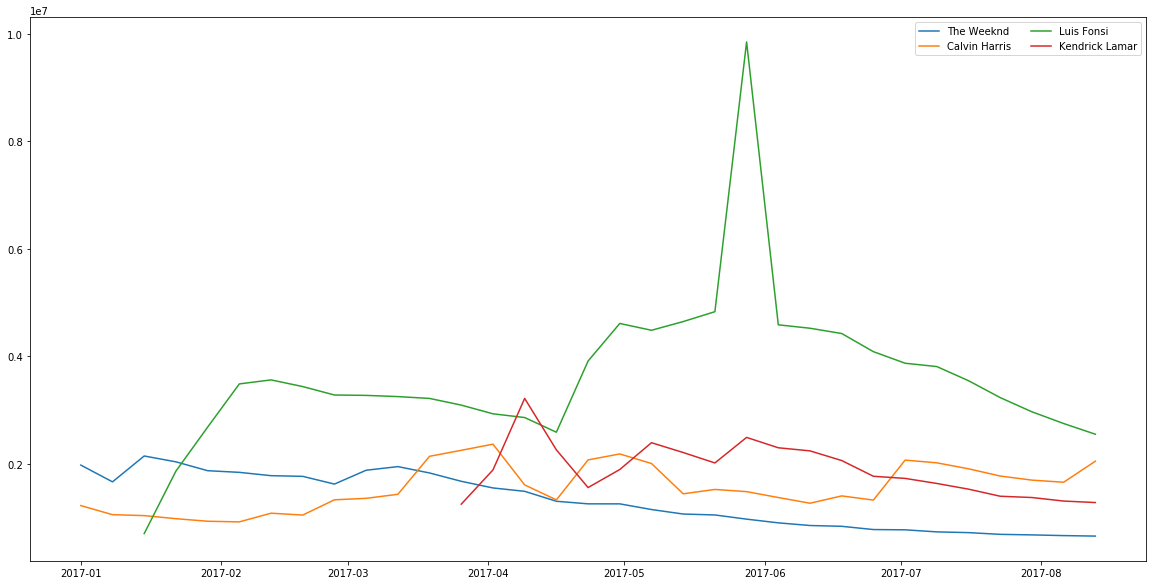

In [119]:
featuredartists

,Streams
Quavo,266306501
Daddy Yankee,176253280
Justin Bieber,147724381
Andrew Taggart,121613354
Nicki Minaj,95696588


Above are the artists that are the most commonly streamed when they are being featured in a song. If we were to create our own song, we would want Quavo, Daddy Yankee, Justin Beiber, Andrew Taggart, or Nicki Minaj. Interestingly, none of these artists were seen in our data consisting of the top five producing artists above. 

## Linear Model

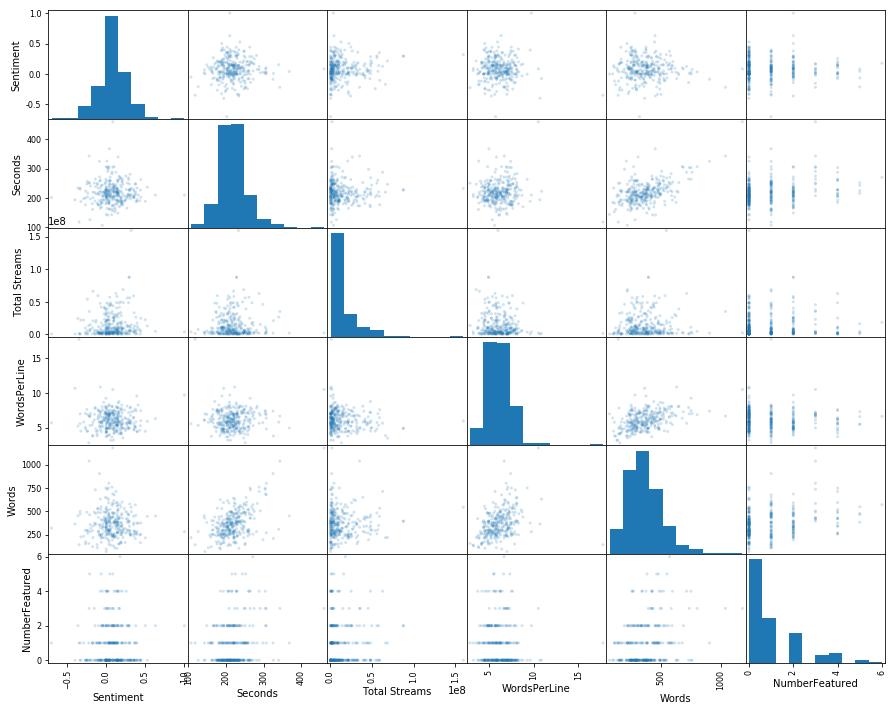

The figure below shows a pairs plot of the five predictor variables (Sentiment, Seconds, WordsPerLine Words, and Number Featured) and response variable (Total Streams). From this plot it is difficult to see what exact values of predictors return the highest response but we can see patterns of correlation and colinearity and the distribution of each variable. Most of the predictor variables appear close to normally distributed or have some minor right-skew to their normality. The one exception is NumberFeatured as its distribution is quite right-skewed. The total streams variable also appears quite right-skewed as most songs appear to be played very infrequently while there are a few select songs that are streamed extremely often. As far as colinearity between predictors, we can see obvious correlation between Seconds and Words as well as a slight correlation between Words and WordsPerLine and NumberFeatured and Words. Thus, Words seems to be highly correlated with a lot of other predictors. This may be cause to remove this predictor from the model once it is built. Moving forward, we will have to look closer at the response variable plots to find predictor values that increase the number of total streams. In these plots, we will log-trasnform the Total Streams variable to reduce the skew and improve readability.

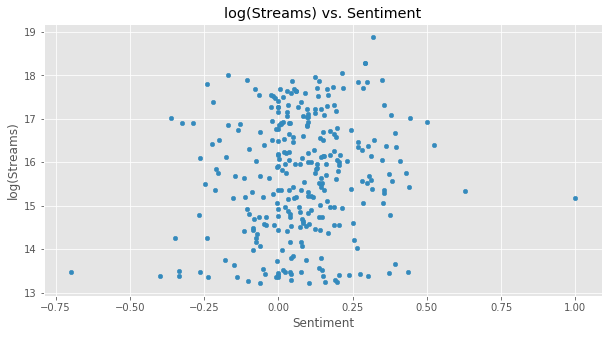

The most apparent feature of this plot is that none of the most popular songs have sentiments that are extreme in either direction. It appears as though the most successful songs have a sentiment of roughly 0.25.

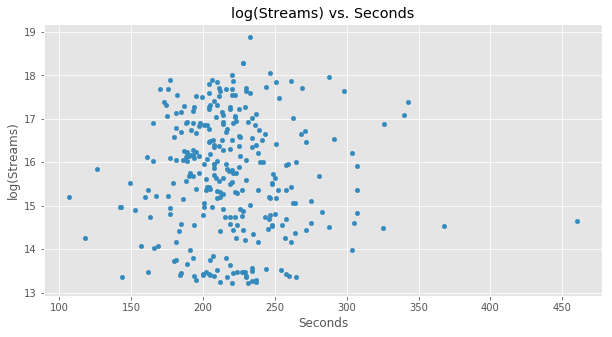

Once again, the most popular songs are clustered in the middle of the range of seconds (from roughly 175 to 300). However, looking at the bottom of the plot we can see that very few of the songs longer than 250 seconds are unpopular. Thus, in order to avoid unpopularity, it is ideal to have a song that is between 250 and 300 seconds long.

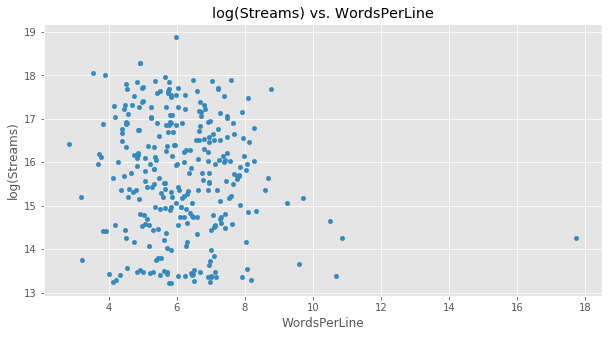

In this plot, although there is a large cluster of points from 4 to 8 words per line, we can see a decline in streams when the words per line increase. In fact, there are four songs that were more frequently streamed that have less than 6 words per line than any song wit more than 8 words per line. Thus, it is most popular to create songs that range from 4 to 6 words per line.

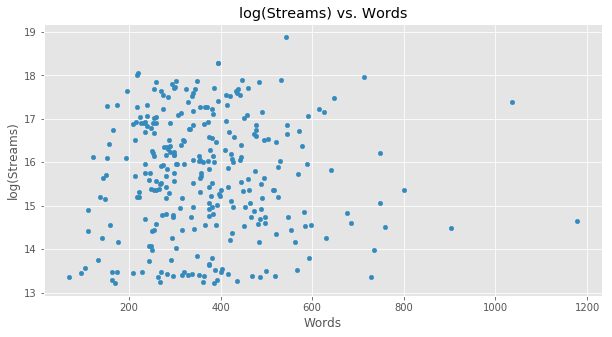

It is difficult to decifer much of a pattern in this plot. It appears as though songs with low word-counts struggle and that songs with high word-counts rarely do poorly. Thus, we can conclude that success peaks around 500 words.

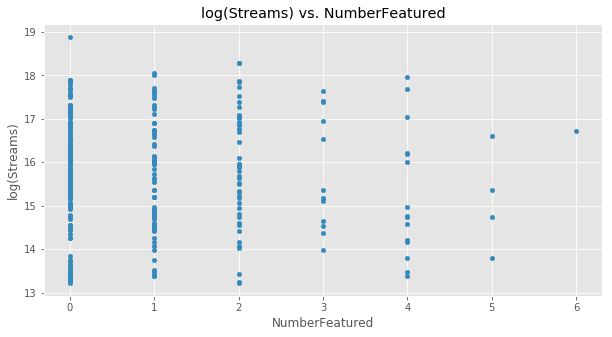

Streams seem to remain fairly constant no matter how many featured artists are used in the song. Removing the one point in the top left corner with no featured artists and abundant success (Shape of You by Ed Sheeran), it appears as though songs with at least one featured artists do slightly better than songs with none. We will say that the target number of featured artists is roughly 2.

Now we will go ahead and build a linear model to attempt to predict total streams per song based on the characteristics that have been outlined. We will be adding three categorical predictors. The purpose of these indicators is to compensate for the fame and reputation that go along with having an artist featured in a song. Each of these indicators will show whether Nicki Minaj, Justin Bieber, or Quavo was featured in the song. Below is the top five rows of the data frame that consists of the variables used to develop the model. This model was the result of trial and error with many different combinations of variables. Each time a variable was shown to be quite insignificant, it was removed from the model. The Adjusted R-squared was used as the target measure of the model that was trying to be maximized. Thus, the following model has the highes Adjusted R-squared of any others attempted.

In [162]:
mod_var = pd.read_csv('mod_var.csv')[2:].reset_index()[['Unnamed: 0','WordsPerLine', 'Nicki Minaj',
       'NumberFeatured', 'Words', 'Seconds', 'Sentiment', 'Streams',
       'Justin Bieber', 'Quavo']]
mod_var = mod_var.rename(index=str, columns={"Unnamed: 0": "Track"})

In [163]:
mod_var.head()

,Track,WordsPerLine,Nicki Minaj,NumberFeatured,Words,Seconds,Sentiment,Streams,Justin Bieber,Quavo
0,24K Magic,4.439999999999999,0,0,382,225,0.12333762333762341,30233935,0,0
1,2U (feat. Justin Bieber),6.03,0,1,217,194,-0.024999999999999998,31433983,1,0
2,4 AM,7.12,0,1,598,255,0.20326028138528143,2119471,0,0
3,4422,4.9,0,0,147,186,0.03333333333333333,3854648,0,0
4,7 Years,8.17,0,0,392,237,0.04080255681818183,593676,0,0


In [125]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sum   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.570
Date:                Sat, 09 Dec 2017   Prob (F-statistic):            0.00106
Time:                        16:00:23   Log-Likelihood:                -5413.7
No. Observations:                 299   AIC:                         1.084e+04
Df Residuals:                     291   BIC:                         1.087e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.255e+07    4.7e+06      4.797      0.000    1.33e+07    3.18e+07
('WordsPerLine', 'mean')   -1.881e+06   7.74e+05     -2.432      0.016    -3.4e+06   -3.59e+05
('Nicki Minaj', 'mean')     1.017e+07   9.09e+06      1.119      0.264   -7.72e+06    2.81e+07
('NumberFeatured', 'mean') -1.389e+06   9.01e+05     -1.541      0.124   -3.16e+06    3.85e+05
('Words', 'mean')           7833.9264   8149.485      0.961      0.337   -8205.478    2.39e+04
('Sentiment', 'mean')       9.767e+06   5.71e+06      1.709      0.088   -1.48e+06     2.1e+07
('Justin Bieber', 'mean')   1.846e+07   9.19e+06      2.009      0.045    3.78e+05    3.65e+07
('Quavo', 'mean')           1.902e+07   6.92e+06      2.746      0.006    5.39e+06    3.26e+07
==============================================================================
Omnibus:                      219.863   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3003.168
Skew:                           2.898   Prob(JB):                         0.00
Kurtosis:                      17.404   Cond. No.                     3.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As can be seen, the model is not very efficient. The Adjusted R-squared is only 0.057 and only three of the seven predictors have a p-value that is significant at an alpha of 0.05. In addition, the standard error of each predictor is quite large, meaning that the precision of the model is not ideal. However, the p-value of the F-test is 0.00106, meaning that the model is statistically significant. 

A similar conclusion can be made observing the graphs below, as the predicted values in blue fail to match the variability of the observed streams in red. On a bright note, the blue line does seem to model the direction of the red line. For example, if the red line juts upward, the blue line usually follows upward as well, just not to the extreme of the actual value. In other words, the predictions are much more constant than the actual values.

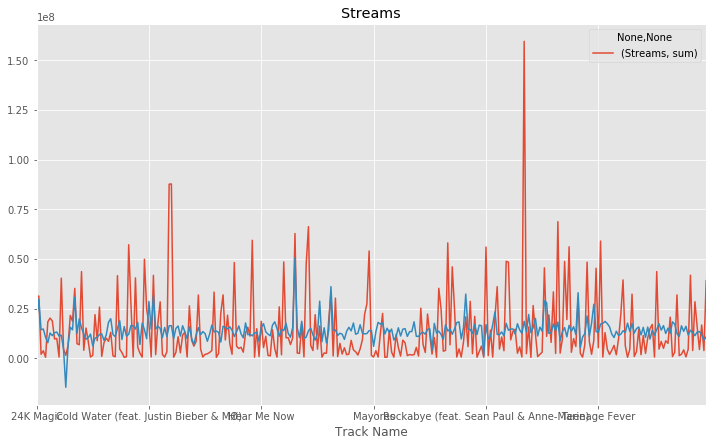

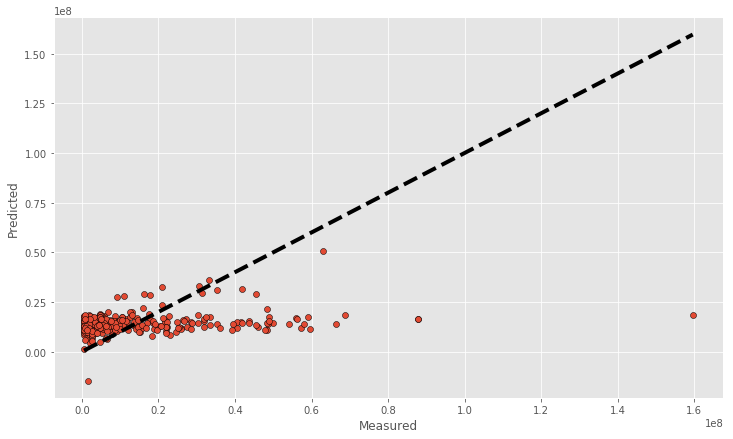

This plot compares the fitted values with the observed values of the response by plotting the observed on the x-axis and the fitted on the y. As was stated previously, the predicted values vary quite little while only a few points seem to follow the hashed line where observed is equal to predicted. This is for a couple reasons. The first of which is because we did not have enough predictors. If we would have had more predictors, say one indicator for each of the featured artists used or a categorical predictor for the genre of music, the model may have been more accurate. The most obvious deficency in this model is also the fact that we are only taking measures on the lyrics, artists, and length of each song and failing to include harmonic patterns or musical riffs (which is arguably most of the appeal of certain music). If we had more advanced software and data-gathering techniques, these more musical aspects could be observed and used as predictors.

## Make a Song

Using the data gathered earlier, we have come to the conclusion about what song characteristics are the most popular. The most popular song should be approximately 250 seconds (4:10) in length, consist of around 500 words, have roughly 5 words per line, be of a fairly positive sentiment (about 0.25 on the TextBlob scale), and feature 2 artists: Quavo and Daddy Yankee. We must also make the lyrics of the song interesting and popular. After taking every word used in every song and weighting each word by the number of times it's used and by the popularity of the song that it is used in, we create a dicitionary of these words and a weighted score for their usefulness for each one.

In [164]:
file = open('created_song_lyrics.txt', 'r') 
print(file.read())

bait pastor ah i first 
karma maybe town parents my 
down up aint feelin por 
itll you only selling fire 
come attitude swimmin up push 
aint thinking theres y tonight 
juntar oo-ooh me in innocent 
medont hear when your tattoo 
think rose da took her 
lookin stomach of okay straight 

my minute rushing bedsheets imagine 
its hear elevarse can said 
i debating yall history take 
and til shoot irish freaky 
throw miles the strong man 
sun ser we know chained 
wish my playin your she 
a way baby pedigree lane 
like can then with coasters 
got me fast your real 

borde with shit dy fit 
the goin alright miracle much 
youll los esperando ocean slam 
fair masoquista light younger i 
shrug out cupid stars ear 
things hearing sky know might 
leave pasaste real y i 
it start lean sobrepasar ves 
real this le todo only 
me block advil cant that 

my minute rushing bedsheets imagine 
its hear elevarse can said 
i debating yall history take 
and til shoot irish freaky 
throw miles the strong man 

As can be seen, this song doesn't make much sense as a whole. Because words are selected individually based on their weights, when they are put together the phrases are incoherent. Also, many of the songs in the data set are in spanish. Thus, this song includes both spanish and english words, which adds to its incoherence. Another problem with this song is that there is no rhyme or syllable sturcture. Although each line has 5 words, the number of syllables in each line varies, causing the rhythmic meter to be inconsistent. Also, a common feature of song lyrics is the rhyming of words between lines, which this song lacks due to its random nature.

In [165]:
file = open('created_song_rhymes.txt', 'r') 
print(file.read())

everything have of eyes easy 
she ft city yeah spell 
was fountain friends luxury brazee 
cute can mama hey adell 
perfect switchin maybe rumbear its 
me it patience throwaways crib 
ive gets i ni constraints 
lower somebody don’t body ib 
mh now in soft it 
dont down feel secret emit 

sides pedestal doing model my 
reality okay mala tomarlo a 
skrrr dice now ritualistic dongmei 
perc hope quavo dreaming ae 
trap it tu 30 trust 
heartache your this have oh 
saw ebbing quiero than based 
strap disobedience extent but owe 
standing savage man-man on let 
house this back him viverette 

cry ache froze ya pop 
pimp love es galway swear 
double snapback stand it schoppe 
tienes coupon gon met behr 
explain y wanna to hoyyo 
week ones plug look that 
tú she to wanna boys 
do said i use pickpocket 
sé fame million mami just 
the fill you never organist 

sides pedestal doing model my 
reality okay mala tomarlo a 
skrrr dice now ritualistic dongmei 
perc hope quavo dreaming ae 
trap it tu 30 

This song is another example of a song that, theoritically, would perform well. Again, the words are jumbled and so there is little coherence thoughout the lines and phrases. However, this song does include a rhyme pattern in each verse. The song follows the rhyme scheme ABABCDCDEE, which is a very popular type of rhyme scheme in contemporary music. Although these songs are fairly useless as a whole, a few observations about them can shed some light on the language used in popular music. First of all, it can be seen that many of the words are slang or words that are made up by the artist themselves. Not only are they not actual words but they are fairly popular, showing how music and the language that is used within can spread quickly and easily. Also, one can notice the topics that are commonly sung about in popular music. Whether it be blatant swearing or risque topics, much of the language is crude in nature. 

Unfortunately, when trying to use PyDictionary to create a song that used part of speech to construct meaningful sentiences, the Jupyter kernel continued to die, making such a creation impossible. 